In [39]:
from SimPEG import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [40]:
import matplotlib
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
matplotlib.rcParams['savefig.dpi'] = 100

In [41]:
cs, ncx, ncy, ncz, npad = 20., 30, 20, 30, 12
hx = [(cs,npad,-1.4), (cs,ncx), (cs,npad,1.4)]
hy = [(cs,npad,-1.4), (cs,ncy), (cs,npad,1.4)]
hz = [(cs,npad,-1.4), (cs,ncz), (cs,npad,1.4)]
mesh = Mesh.TensorMesh([hx,hy,hz], 'CCC')
print ("Padding distance x: %10.5f m") % (np.sum(mesh.hx[:npad]))
print ("Padding distance z: %10.5f m") % (np.sum(mesh.hz[:npad]))
print ("Min dx: %10.5f m") % (mesh.hx.min())
print ("Min dz: %10.5f m") % (mesh.hz.min())

Padding distance x: 3898.57387 m
Padding distance z: 3898.57387 m
Min dx:   20.00000 m
Min dz:   20.00000 m


In [42]:
print mesh

  ---- 3-D TensorMesh ----  
   x0: -4198.57
   y0: -4098.57
   z0: -4198.57
  nCx: 54
  nCy: 44
  nCz: 54
   hx: 1133.88, 809.91, 578.51, 413.22, 295.16, 210.83, 150.59, 107.56, 76.83, 54.88, 39.20, 28.00, 30*20.00, 28.00, 39.20, 54.88, 76.83, 107.56, 150.59, 210.83, 295.16, 413.22, 578.51, 809.91, 1133.88
   hy: 1133.88, 809.91, 578.51, 413.22, 295.16, 210.83, 150.59, 107.56, 76.83, 54.88, 39.20, 28.00, 20*20.00, 28.00, 39.20, 54.88, 76.83, 107.56, 150.59, 210.83, 295.16, 413.22, 578.51, 809.91, 1133.88
   hz: 1133.88, 809.91, 578.51, 413.22, 295.16, 210.83, 150.59, 107.56, 76.83, 54.88, 39.20, 28.00, 30*20.00, 28.00, 39.20, 54.88, 76.83, 107.56, 150.59, 210.83, 295.16, 413.22, 578.51, 809.91, 1133.88


In [43]:
def circfun(xc, yc, r, npoint):
    theta = np.linspace(np.pi, -np.pi, npoint)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return x+xc, y+yc

In [44]:
xcirc1, ycirc1 = circfun(-150., 0., 250., 60)
xcirc2, ycirc2 = circfun(150., 0., 250., 60)


In [45]:
# Utils.meshutils.writeUBCTensorMesh(mesh, 'mesh.msh')

In [46]:
sigma = Utils.meshutils.readUBCTensorModel('sigma_realistic.con', mesh)

In [47]:
mopt = np.load('./inv3D_realistic/model_11.npy')
active = mesh.gridCC[:,2] < 0.
actMap = Maps.ActiveCells(mesh, active, np.log(1e-8), nC=mesh.nC)
mapping = Maps.ExpMap(mesh) * actMap

In [48]:
sigma_est = mapping*mopt

In [49]:
# Utils.meshutils.writeUBCTensorModel(mesh, sigma_est, 'sigest3D_realistic.con')

In [50]:
x1 = np.arange(30)*10 - 300.
y1 = np.arange(30)*10 - 150.
xyz1 = Utils.ndgrid(x1, y1, np.r_[0.])
x2 = np.arange(30)*10 + 10.
y2 = np.arange(30)*10 - 150.
xyz2 = Utils.ndgrid(x2, y2, np.r_[0.])


-130.0


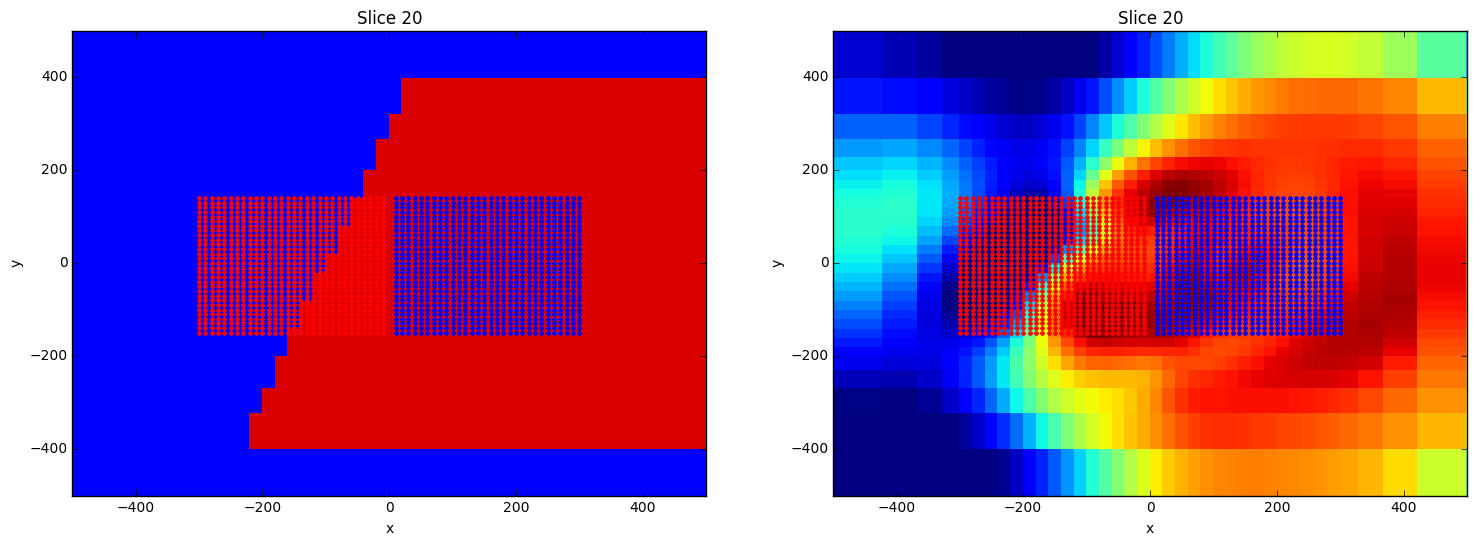

In [51]:
# mopt = np.load('./inv3D_realistic_1/model_10.npy')
fig, ax = plt.subplots(1,2, figsize=(18,6))
indz1 = 20
indz2 = indz1
print mesh.vectorCCz[indz1]
mesh.plotSlice(np.log10(sigma), ind = indz1, ax = ax[0], clim=(-3, -0.5))
mesh.plotSlice(np.log10(mapping*mopt), ind = indz2, ax = ax[1], clim=(-3, -0.5))

for i in range(2):
    ax[i].plot(xyz1[:,0], xyz1[:,1], 'r.')
    ax[i].plot(xyz2[:,0], xyz2[:,1], 'b.')
#     ax[i].plot(xcirc1, ycirc1, 'r-')
#     ax[i].plot(xcirc2, ycirc2, 'b-')
    ax[i].set_xlim(-500, 500)
    ax[i].set_ylim(-500, 500)


-30.0


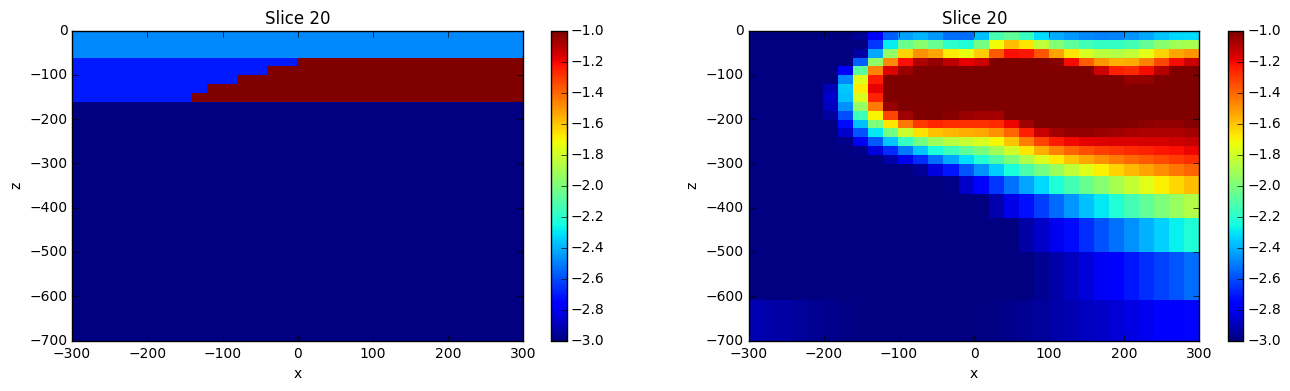

In [52]:
indy=20
fig, ax = plt.subplots(1,2, figsize=(16,4))
print mesh.vectorCCy[indy]
dat0 = mesh.plotSlice(np.log10(sigma), normal='Y', ind = indy, ax = ax[0], clim=(-3, -1))
dat1 = mesh.plotSlice(np.log10(mapping*mopt), normal='Y', ind = indy, ax = ax[1], clim=(-3, -1))
for i in range(2):
    plt.colorbar(dat0[0], ax = ax[i])
    ax[i].set_xlim(-300, 300)
    ax[i].set_ylim(-700, 0.)

30.0


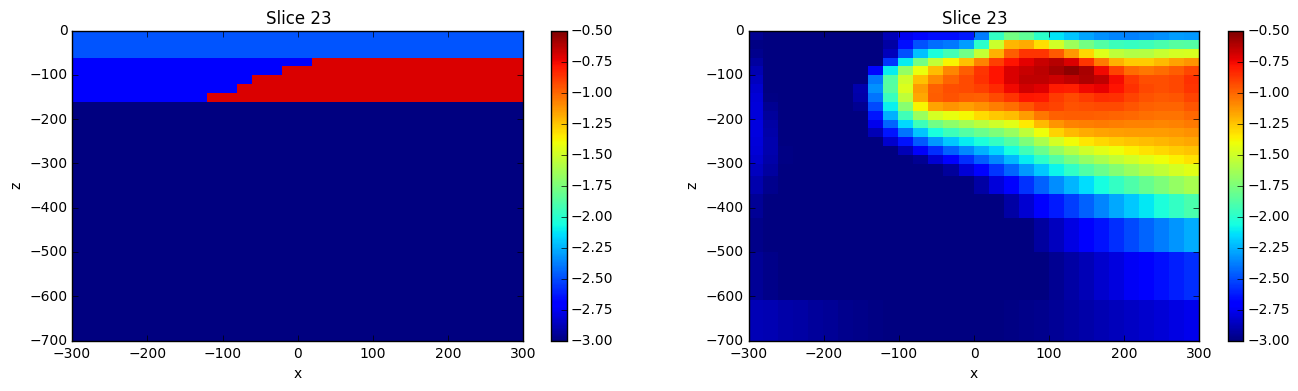

In [53]:
indy=23
fig, ax = plt.subplots(1,2, figsize=(16,4))
print mesh.vectorCCy[indy]
dat0 = mesh.plotSlice(np.log10(sigma), normal='Y', ind = indy, ax = ax[0], clim=(-3, -0.5))
dat1 = mesh.plotSlice(np.log10(mapping*mopt), normal='Y', ind = indy, ax = ax[1], clim=(-3, -0.5))
for i in range(2):
    plt.colorbar(dat0[0], ax = ax[i])
    ax[i].set_xlim(-300, 300)
    ax[i].set_ylim(-700, 0.)

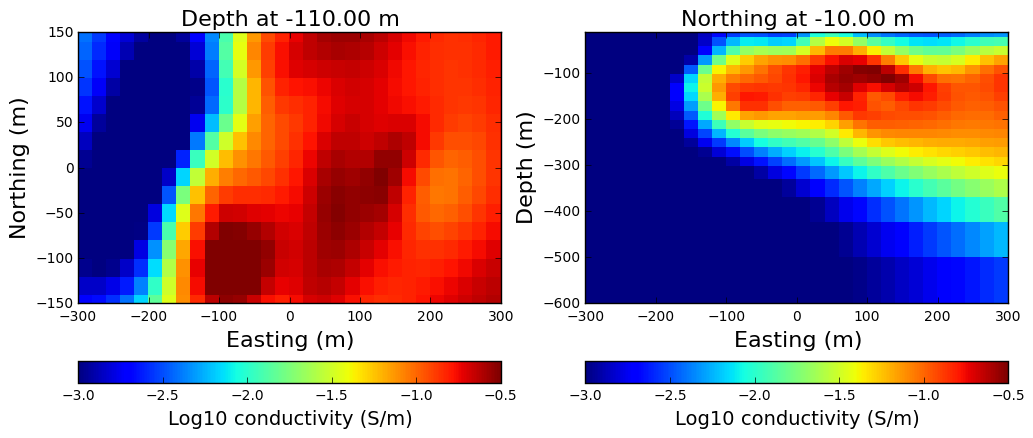

In [54]:
indy = 21
indz = 21
fig, ax = plt.subplots(1,2, figsize = (12, 5))
# vmin = np.log10(Utils.mkvc(SigMat).min())
# vmax = np.log10(Utils.mkvc(SigMat).max())
dat = mesh.plotSlice(np.log10(sigma_est), ind = indz, normal='Z', ax = ax[0], clim=(-3, -0.5))
dat = mesh.plotSlice(np.log10(sigma_est), ind = indy, normal='Y', ax = ax[1], clim=(-3, -0.5))
for i in range(2):
    if i==0:
        ax[i].set_xlabel('Easting (m)', fontsize = 16)
        ax[i].set_ylabel('Northing (m)', fontsize = 16)        
        ax[i].set_ylim(-150., 150.)
        ax[i].set_xlim(-300., 300.)        
        ax[i].set_title(('Depth at %5.2f m')%(mesh.vectorCCz[indz]), fontsize = 16)
    elif i==1:
        ax[i].set_xlabel('Easting (m)', fontsize = 16)
        ax[i].set_ylabel('Depth (m)', fontsize = 16)                
        ax[i].set_ylim(-600., -10.)
        ax[i].set_xlim(-300., 300.)        
        ax[i].set_title(('Northing at %5.2f m')%(mesh.vectorCCy[indy]), fontsize = 16)
    cb = plt.colorbar(dat[0], ax=ax[i], orientation = 'horizontal', ticks = [np.arange(6)*0.5-3])
    cb.set_label('Log10 conductivity (S/m)', fontsize = 14)
# fig.savefig('./figures/sigestTD.png', dpi = 200)    

In [55]:
import simpegEM as EM
mapping = Maps.IdentityMap(mesh)

In [56]:
ntx = 2
nrx1 = xyz1.shape[0]
time = np.logspace(-4, -2, 31)

In [57]:
print time

[ 0.0001      0.00011659  0.00013594  0.00015849  0.00018478  0.00021544
  0.00025119  0.00029286  0.00034145  0.00039811  0.00046416  0.00054117
  0.00063096  0.00073564  0.0008577   0.001       0.00116591  0.00135936
  0.00158489  0.00184785  0.00215443  0.00251189  0.00292864  0.00341455
  0.00398107  0.00464159  0.0054117   0.00630957  0.00735642  0.00857696
  0.01      ]


In [58]:
rx1 = EM.TDEM.RxTDEM(xyz1, time, 'bz')
tx1 = EM.TDEM.SrcTDEM_CircularLoop_MVP([rx1], np.array([0., -150., 0.]), radius = 250.)
tx1.radius = 250.
rx2 = EM.TDEM.RxTDEM(xyz2, time, 'bz')
tx2 = EM.TDEM.SrcTDEM_CircularLoop_MVP([rx2],np.array([0.,  150., 0.]), radius = 250.)
tx2.radius = 250.

In [59]:
from pymatsolver import MumpsSolver
survey = EM.TDEM.SurveyTDEM([tx1, tx2])
prb = EM.TDEM.ProblemTDEM_b(mesh, mapping=mapping, verbose=True)
prb.solver = MumpsSolver
prb.solverOpts = {"symmetric":True}
prb.timeSteps = [(1e-4/15, 10), (1e-3/15, 10), (1e-2/15, 5)]
# prb.timeSteps = [(1e-4/15, 10)]
if prb.ispaired:
    prb.unpair()
if survey.ispaired:
    survey.unpair()
prb.pair(survey)

In [60]:
dpred = np.load('bz_realistic.npy')

In [61]:
noise = abs(dpred)*np.random.randn(dpred.size)*0.05 
dobs = dpred+noise

In [62]:
dest = np.load('inv3D_realistic/dpred_15.npy')

In [63]:
Dpred = dobs.reshape((900, 31, 2), order='F')
Dpred1 = Dpred[:,:,0]
Dpred2 = Dpred[:,:,1]
Dest = dest.reshape((900, 31, 2), order='F')
Dest1 = Dest[:,:,0]
Dest2 = Dest[:,:,1]

In [64]:
# print time[itime]

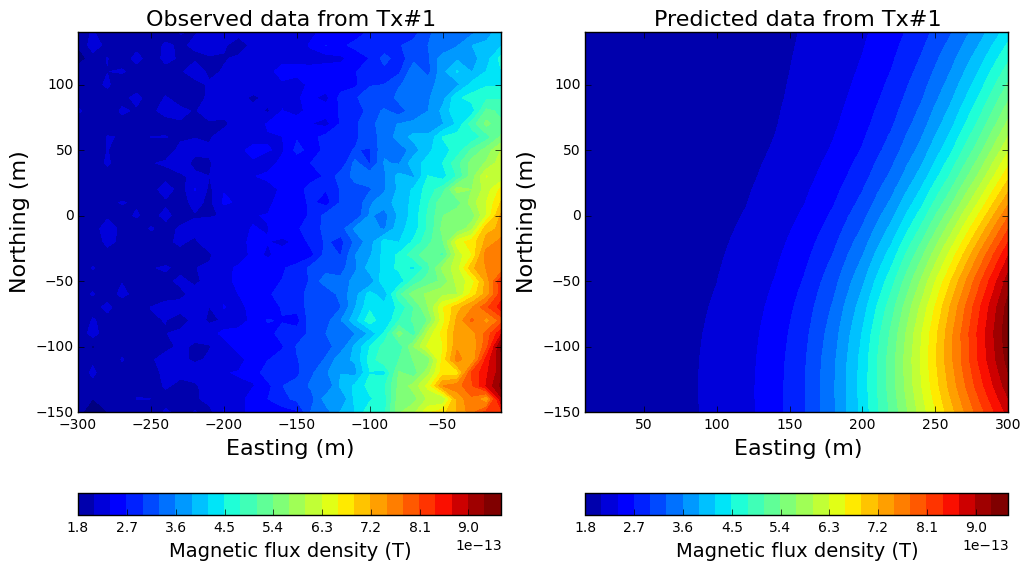

In [65]:
itime = 28
fig, ax = plt.subplots(1,2, figsize = (12, 7))
vmin = Utils.mkvc(Dpred[:,itime,0]).min()
vmax = Utils.mkvc(Dpred[:,itime,0]).max()
dat1 = ax[0].contourf(xyz1[:,0].reshape((30, 30), order='F'), xyz1[:,1].reshape((30, 30), order='F'),  Dpred[:,itime,0].reshape((30, 30), order='F'), 30, vmin=vmin, vmax=vmax)
dat1 = ax[1].contourf(xyz2[:,0].reshape((30, 30), order='F'), xyz2[:,1].reshape((30, 30), order='F'),  Dest[:,itime,0].reshape((30, 30), order='F'), 30, vmin=vmin, vmax=vmax)
for i in range(2):
    ax[i].set_xlabel('Easting (m)', fontsize = 16)
    ax[i].set_ylabel('Northing (m)', fontsize = 16)
    cb = plt.colorbar(dat1, ax=ax[i], orientation='horizontal')
    cb.set_label('Magnetic flux density (T)', fontsize = 14)
ax[0].set_title('Observed data from Tx#1', fontsize = 16)
ax[1].set_title('Predicted data from Tx#1', fontsize = 16)
fig.savefig('./figures/obspredTD_7_3mstx1.png')

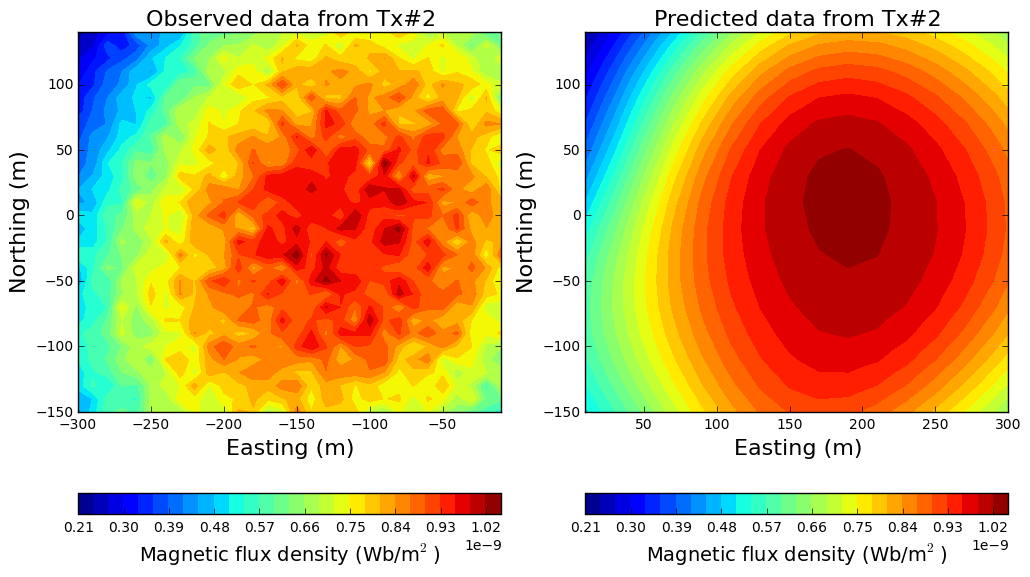

In [66]:
itime = 9
fig, ax = plt.subplots(1,2, figsize = (12, 7))
vmin = Utils.mkvc(Dpred[:,itime,1]).min()
vmax = Utils.mkvc(Dpred[:,itime,1]).max()    
dat1 = ax[0].contourf(xyz1[:,0].reshape((30, 30), order='F'), xyz1[:,1].reshape((30, 30), order='F'),  Dpred[:,itime,1].reshape((30, 30), order='F'), 30)
dat1 = ax[1].contourf(xyz2[:,0].reshape((30, 30), order='F'), xyz2[:,1].reshape((30, 30), order='F'),  Dest[:,itime,1].reshape((30, 30), order='F'), 30)
for i in range(2):
    ax[i].set_xlabel('Easting (m)', fontsize = 16)
    ax[i].set_ylabel('Northing (m)', fontsize = 16)
    cb = plt.colorbar(dat1, ax=ax[i], orientation='horizontal')
    cb.set_label('Magnetic flux density (Wb/m$^2$)', fontsize = 14)
ax[0].set_title('Observed data from Tx#2', fontsize = 16)
ax[1].set_title('Predicted data from Tx#2', fontsize = 16)
fig.savefig('./figures/obspredTD_7_3mstx2.png')

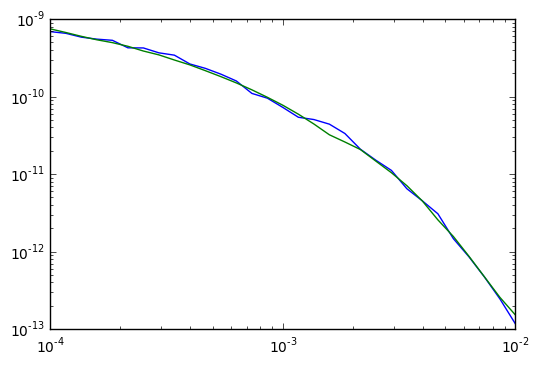

In [67]:
rxind = 20
plt.loglog(time, Dpred[rxind,:,0])
plt.loglog(time, Dest[rxind,:,0])

(array([  10.,   14.,   22.,   39.,   69.,  101.,  181.,  249.,  175.,   40.]),
 array([  4.42513170e-10,   5.60237924e-10,   6.77962677e-10,
          7.95687430e-10,   9.13412183e-10,   1.03113694e-09,
          1.14886169e-09,   1.26658644e-09,   1.38431120e-09,
          1.50203595e-09,   1.61976070e-09]),
 <a list of 10 Patch objects>)

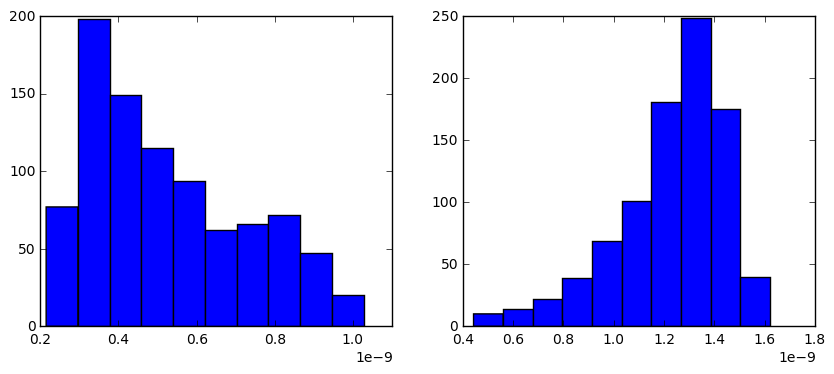

In [68]:
itime = 0
fig, ax = plt.subplots(1,2, figsize = (10, 4))
ax[0].hist(Dpred1[:,itime])
ax[1].hist(Dpred2[:,itime])

In [ ]:
from JSAnimation import IPython_display
from matplotlib import animation
fig, ax = plt.subplots(1,2, figsize = (12, 5))
for i in range(2):
    ax[i].set_xlabel('x (m)', fontsize = 16)
    ax[i].set_ylabel('y (m)', fontsize = 16)

def animate(itime):
    frame1 = ax[0].contourf(xyz1[:,0].reshape((30, 30), order='F'), xyz1[:,1].reshape((30, 30), order='F'),  Dpred[:,itime,0].reshape((30, 30), order='F'), 30)
    frame2 = ax[1].contourf(xyz2[:,0].reshape((30, 30), order='F'), xyz2[:,1].reshape((30, 30), order='F'),  Dpred[:,itime,1].reshape((30, 30), order='F'), 30)
#     cb1 = plt.colorbar(frame1, ax = ax[0])
#     cb2 = plt.colorbar(frame2, ax = ax[1])    
    return frame1, frame2
animation.FuncAnimation(fig, animate, frames=31, interval=40, blit=True)

In [70]:
# np.save('bzobs_realistic', dobs)
# dmis = DataMisfit.l2_DataMisfit(survey)